In [1]:
# Import the necessary libraries
import pandas as pd

# Define the file paths
subdirectory = "pickle_data"
training_features_path = f"{subdirectory}/training_features.pkl"
validation_features_path = f"{subdirectory}/validation_features.pkl"
test_features_path = f"{subdirectory}/test_features.pkl"
training_labels_path = f"{subdirectory}/training_labels.pkl"
validation_labels_path = f"{subdirectory}/validation_labels.pkl"
test_labels_path = f"{subdirectory}/test_labels.pkl"

# Read the pickle files
training_features = pd.read_pickle(training_features_path)
validation_features = pd.read_pickle(validation_features_path)
test_features = pd.read_pickle(test_features_path)
training_labels = pd.read_pickle(training_labels_path)
validation_labels = pd.read_pickle(validation_labels_path)
test_labels = pd.read_pickle(test_labels_path)

# Verify the loaded data by printing their shapes and a few rows
print("Loaded Training features dimensions:", training_features.shape)
print("Loaded Validation features dimensions:", validation_features.shape)
print("Loaded Test features dimensions:", test_features.shape)
print()
print("Loaded Training labels dimensions:", training_labels.shape)
print("Loaded Validation labels dimensions:", validation_labels.shape)
print("Loaded Test labels dimensions:", test_labels.shape)
print()

print("First few rows of loaded training features:")
print(training_features.head())
print()
print("First few rows of loaded training labels:")
print(training_labels.head())


Loaded Training features dimensions: (7391, 21)
Loaded Validation features dimensions: (2112, 21)
Loaded Test features dimensions: (1057, 21)

Loaded Training labels dimensions: (7391, 1)
Loaded Validation labels dimensions: (2112, 1)
Loaded Test labels dimensions: (1057, 1)

First few rows of loaded training features:
         Date  Holiday  NextDayHoliday  IsWeekend  Month  KielerWeek  \
0  2016-05-03    False           False      False      5       False   
1  2016-05-26    False           False      False      5       False   
2  2016-01-05     True            True      False      1       False   
3  2014-06-15    False           False       True      6       False   
4  2016-01-03     True            True       True      1       False   

   IsNewYearsEve  IsHalloween     t        lag_1  ...  roll28_mean  year_sin1  \
0          False        False  1018   807.468717  ...   842.802070  -0.847173   
1          False        False  1041   757.312452  ...  1008.138049  -0.576948   
2  

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
  InputLayer(shape=(training_features.shape[1], )),
  BatchNormalization(),
  Dense(10, activation='relu'),
  Dense(4, activation='relu'),
  Dense(1)
])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_1           │ (None, 1778)           │         7,112 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        17,790 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,951 (97.46 KB)

 Trainable params: 21,395 (83.57 KB)

 Non-trainable params: 3,556 (13.89 KB)

In [22]:
print(training_features.shape)  # should show (7391, 1778)

(7391, 1778)


In [23]:
print(training_features.shape)
print(model.input_shape)


(7391, 1778)
(None, 1778)


In [24]:
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = model.fit(training_features, training_labels, epochs=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 31452.8320 - val_loss: 21483.7207
Epoch 2/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 20832.1465 - val_loss: 19790.0039
Epoch 3/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18822.0312 - val_loss: 17412.9766
Epoch 4/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15583.9482 - val_loss: 13598.9355
Epoch 5/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11068.3320 - val_loss: 9297.4668
Epoch 6/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7599.6499 - val_loss: 6917.4595
Epoch 7/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6346.5249 - val_loss: 6123.9424
Epoch 8/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5798.4473 - val_loss: 5665.1157
Epoch 9/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5511.8721 - val_loss: 5507.8281
Epoch 10/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5437.9658 - val_loss: 5367.9106
Epoch 11/20
231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5303.5063

In [25]:
model.save("python_model.h5")

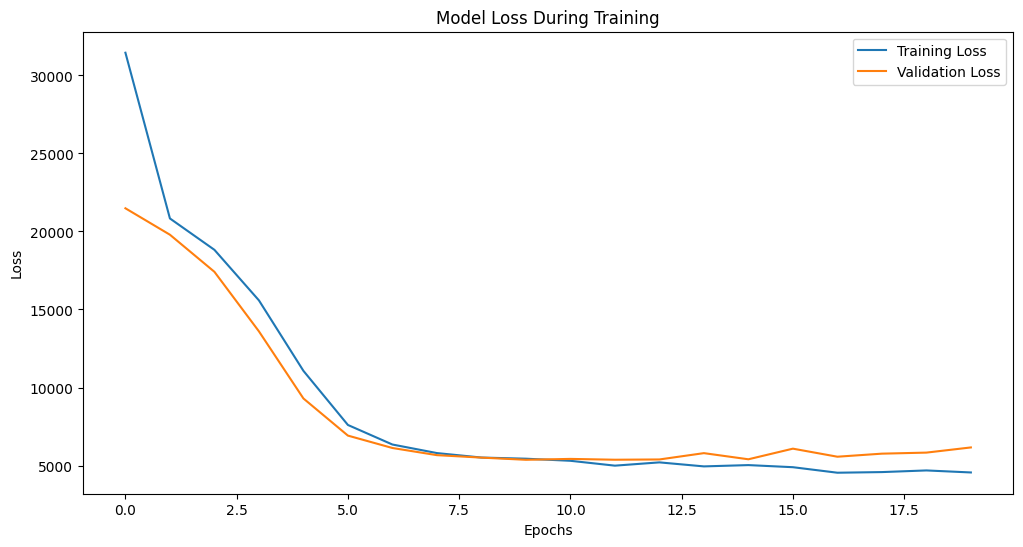

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [28]:
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")


231/231 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
MAPE on the Training Data: 31.15%
MAPE on the Validation Data: 38.04%


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


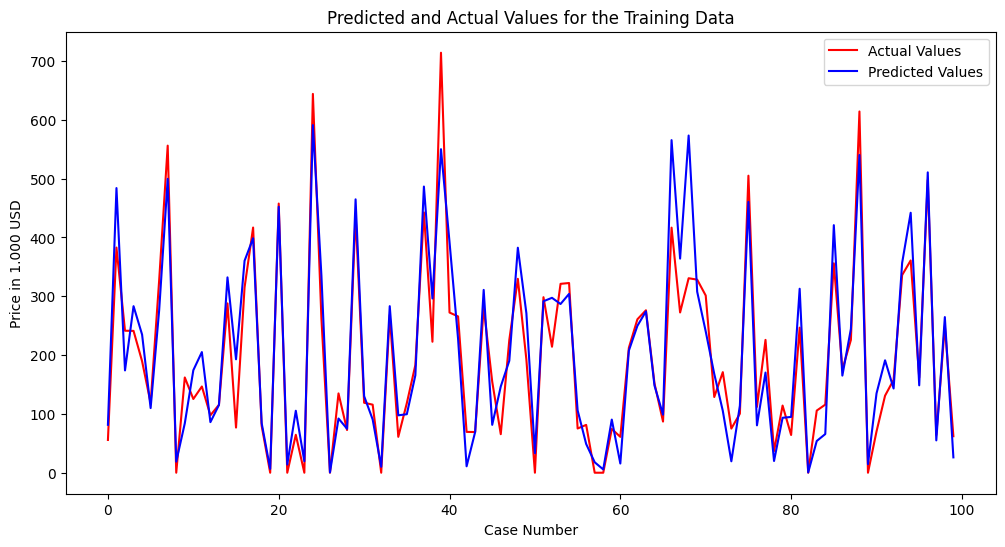

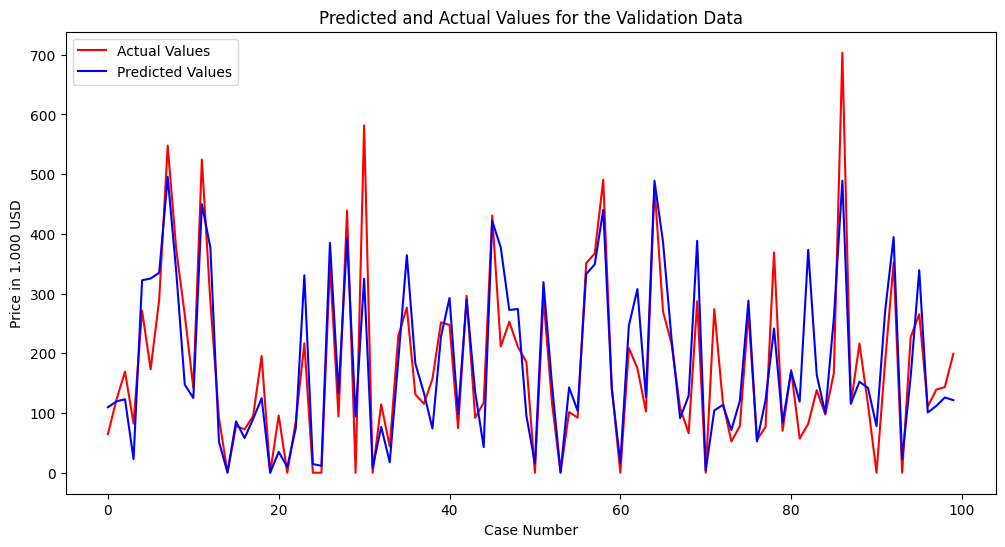

In [29]:
def plot_predictions(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data['actual'], label='Actual Values', color='red')
    plt.plot(data['prediction'], label='Predicted Values', color='blue')
    plt.title(title)
    plt.xlabel('Case Number')
    plt.ylabel('Price in 1.000 USD')
    plt.legend()
    plt.show()

# Ensure that training_predictions, validation_predictions, training_labels, and validation_labels are numpy arrays
training_predictions = np.array(training_predictions).flatten()
validation_predictions = np.array(validation_predictions).flatten()
training_labels = np.array(training_labels).flatten()
validation_labels = np.array(validation_labels).flatten()

# print the type of the predictions
print(type(training_predictions))
print(type(validation_predictions))

# Create DataFrames with 1-dimensional arrays
data_train = pd.DataFrame({'prediction': training_predictions, 'actual': training_labels})
data_validation = pd.DataFrame({'prediction': validation_predictions, 'actual': validation_labels})

# Plot predictions
plot_predictions(data_train.head(100), 'Predicted and Actual Values for the Training Data')
plot_predictions(data_validation.head(100), 'Predicted and Actual Values for the Validation Data')